In [1]:
# hides all warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# imports
# pandas 
import pandas as pd
# numpy
import numpy as np
# matplotlib 
import matplotlib.pyplot as plt
#%matplotlib inline
plt.style.use('ggplot')
# seaborn
import seaborn as sns
# utils
import utils


In [6]:
# Read Data 
##############################################################

# assign spreadsheet filename: file
file = './lr-data.xlsx'

In [7]:
 #load spreadsheet xls
xls = pd.ExcelFile(file)


In [8]:
# print sheet names
print(xls.sheet_names)


['Ex1', 'Ex2', 'Ex3', 'Ex4', 'Ex5', 'LRO', 'Ex6']


In [9]:
# load a sheet into a dataFrame by name
df = xls.parse('Ex1')


In [10]:
# Exploratory Data Analytics
##############################################################

# columns
print("\n*** Columns ***")
print(df.columns)


*** Columns ***
Index(['Id', 'Hits', 'Revenue'], dtype='object')


In [11]:
# info
print("\n*** Structure ***")
print(df.info())


*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Id       14 non-null     int64
 1   Hits     14 non-null     int64
 2   Revenue  14 non-null     int64
dtypes: int64(3)
memory usage: 464.0 bytes
None


In [12]:
# summary
print("\n*** Summary ***")
print(df.describe())


*** Summary ***
            Id        Hits     Revenue
count  14.0000   14.000000   14.000000
mean    7.5000  506.857143  494.714286
std     4.1833  164.200092  255.699472
min     1.0000  284.000000  147.000000
25%     4.2500  372.000000  235.000000
50%     7.5000  508.500000  502.000000
75%    10.7500  598.000000  698.000000
max    14.0000  780.000000  893.000000


In [13]:
# head
print("\n*** Head ***")
print(df.head())


*** Head ***
   Id  Hits  Revenue
0   1   402      400
1   2   780      722
2   3   598      893
3   4   284      147
4   5   362      175


In [14]:
# Dependent Variable 
##############################################################

# store dep variable  
# change as required
depVars = "Revenue"
print("\n*** Dep Vars ***")
print(depVars)



*** Dep Vars ***
Revenue


In [15]:
# Data Transformation
##############################################################

# drop cols
# change as required
print("\n*** Drop Cols ***")
df = df.drop('Id', axis=1)
print("Done ...")


*** Drop Cols ***
Done ...


In [16]:
# check outlier count
print('\n*** Outlier Count ***')
print(utils.OutlierCount(df))



*** Outlier Count ***
Hits       0
Revenue    0
dtype: int64


In [17]:
# check outlier values
print('\n*** Outlier Values ***')
print(utils.OutlierValues(df))



*** Outlier Values ***
Hits       []
Revenue    []
dtype: object


In [18]:
# handle outliers if required

In [19]:
# check variance
print('\n*** Variance In Columns ***')
print(df.var())



*** Variance In Columns ***
Hits       26961.67033
Revenue    65382.21978
dtype: float64


In [20]:
# check std dev 
print('\n*** StdDev In Columns ***')
print(df.std())



*** StdDev In Columns ***
Hits       164.200092
Revenue    255.699472
dtype: float64


In [21]:
# check mean
print('\n*** Mean In Columns ***')
print(df.mean())



*** Mean In Columns ***
Hits       506.857143
Revenue    494.714286
dtype: float64


In [22]:
# handle normalization if required

In [23]:
# check zeros
print('\n*** Columns With Zeros ***')
print((df==0).sum())



*** Columns With Zeros ***
Hits       0
Revenue    0
dtype: int64


In [24]:
# handle zeros if required


In [25]:
# check nulls
print('\n*** Columns With Nulls ***')
print(df.isnull().sum()) 



*** Columns With Nulls ***
Hits       0
Revenue    0
dtype: int64


In [26]:
# handle nulls if required

In [27]:
# check relation with corelation - table
print("\n*** Correlation Table ***")
pd.options.display.float_format = '{:,.2f}'.format
print(df.corr())



*** Correlation Table ***
         Hits  Revenue
Hits     1.00     0.90
Revenue  0.90     1.00


In [28]:
# handle multi colinearity if required



*** Heat Map ***


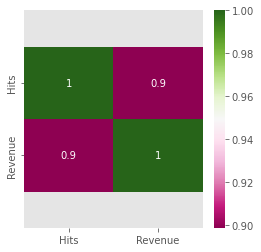

In [30]:
# Visual Data Analytics

# check relation with corelation - heatmap
print("\n*** Heat Map ***")
plt.figure(figsize=(4,4))
ax = sns.heatmap(df.corr(), annot=True, cmap="PiYG")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()


*** Boxplot ***


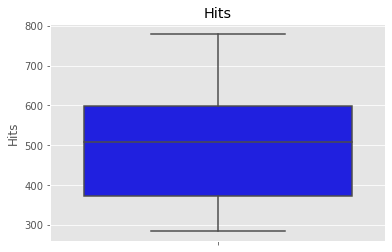

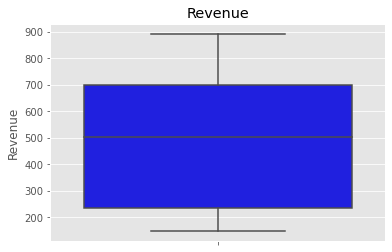

In [31]:
# boxplot
print('\n*** Boxplot ***')
colNames = df.columns.tolist()
for colName in colNames:
    colValues = df[colName].values
    plt.figure()
    sns.boxplot(y=df[colName], color='b')
    plt.title(colName)



*** Boxplot ***


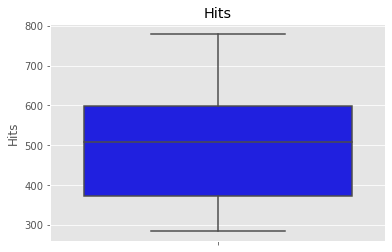

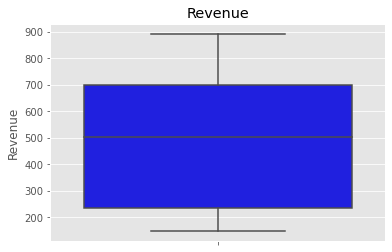

In [32]:
# boxplot
print('\n*** Boxplot ***')
colNames = df.columns.tolist()
for colName in colNames:
    colValues = df[colName].values
    plt.figure()
    sns.boxplot(y=df[colName], color='b')
    plt.title(colName)



*** Histograms ***


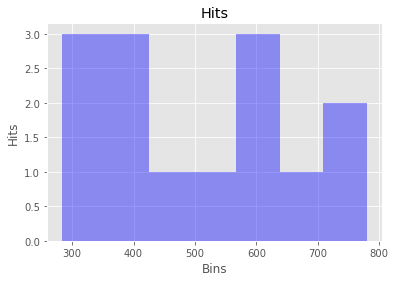

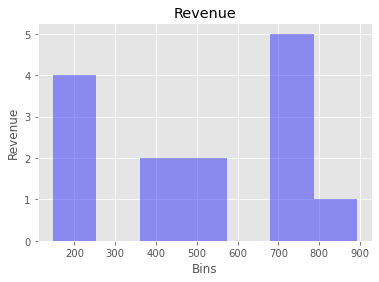

In [33]:
# plot histograms
print('\n*** Histograms ***')
colNames = df.columns.tolist()
for colName in colNames:
    colValues = df[colName].values
    plt.figure()
    sns.distplot(colValues, bins=7, kde=False, color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()


*** Scatterplot ***


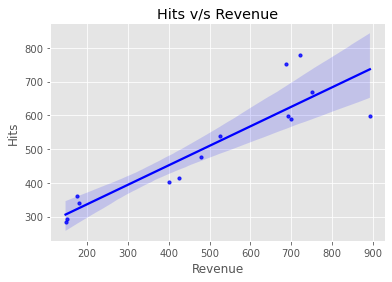

In [34]:
# scatter plot - hits & rev - spl case
print('\n*** Scatterplot ***')
plt.figure()
sns.regplot(x='Revenue', y='Hits', data=df, color= 'b', scatter_kws={"s": 10})
plt.title('Hits v/s Revenue')
plt.ylabel('Hits')
plt.xlabel('Revenue')
# good practice
plt.show()

In [35]:
# Model Creation & Fitting And Prediction for Feature 
##############################################################

# all cols except dep var
print("\n*** Regression Data ***")
allCols = df.columns.tolist()
print(allCols)
allCols.remove(depVars)
print(allCols)



*** Regression Data ***
['Hits', 'Revenue']
['Hits']


In [36]:
# regression summary for feature

print("\n*** Regression Summary ***")
import statsmodels.api as sm
X = sm.add_constant(df[allCols])
y = df[depVars]
OlsSmry = sm.OLS(y, X)
LRModel = OlsSmry.fit()
print(LRModel.summary())


*** Regression Summary ***
                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     50.47
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           1.24e-05
Time:                        18:47:27   Log-Likelihood:                -85.414
No. Observations:                  14   AIC:                             174.8
Df Residuals:                      12   BIC:                             176.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -214.7397   

In [37]:
# now create linear regression model
print("\n*** Regression Model ***")
X = df[allCols].values.reshape(-1,1)
y = df[depVars].values
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))


*** Regression Model ***
(14, 1)
(14,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
print(model)
model.fit(X,y)

LinearRegression()


LinearRegression()

In [39]:
# predict
p = model.predict(X)
df['predict'] = p



*** Scatter Plot ***


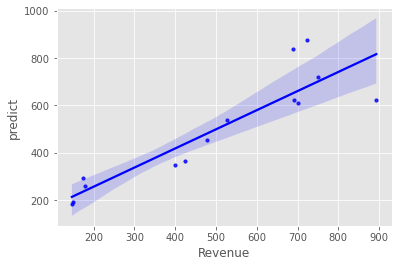

In [40]:
# Model Evaluation
##############################################################

# visualize 
print("\n*** Scatter Plot ***")
plt.figure()
sns.regplot(data=df, x=depVars, y='predict', color='b', scatter_kws={"s": 10})
plt.show()

In [41]:
# mae 
print("\n*** Mean Absolute Error ***")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df[depVars], df['predict'])
print(mae)


*** Mean Absolute Error ***
84.80827192088032


In [42]:
# mse
print("\n*** Mean Squared Error ***")
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df[depVars], df['predict'])
print(mse)


*** Mean Squared Error ***
11662.013432523314


In [51]:
# rmse 
print("\n*** Root Mean Squared Error ***")
rmse = np.sqrt(mse)
print(rmse)


*** Root Mean Squared Error ***
107.99080253671288


In [44]:
# check mean
print('\n*** Mean ***')
print(df[depVars].mean())
print(df['predict'].mean())


*** Mean ***
494.7142857142857
494.7142857142858


In [48]:
### accuracy
# MAPE(Mean Absolute Percentage Error)

mape = np.mean(np.abs(df['predict'] - df[depVars])/np.abs(df[depVars]))
acc = 1 - mape


In [47]:
# scatter index (SI) is defined to judge whether RMSE is good or not. 
# SI=RMSE/measured data mean. 
# If SI is less than one, your estimations are acceptable.
# closer to zero the better
print('\n*** Scatter Index ***')
si = rmse/df[depVars].mean()
print(si)


*** Scatter Index ***
0.21828923411983545


In [49]:
# predict for rooms from 200 to 500 step 100
prd_X = np.array([[200],[300],[400],[500]])
print(prd_X.flatten())

[200 300 400 500]


In [50]:
prd_p = model.predict(prd_X)
print(prd_p)

[ 65.20268415 205.17387647 345.14506878 485.1162611 ]
